# Problem Statement

    Decision Tree

    About the data: 
    Let’s consider a Company dataset with around 10 variables and 400 records. 
    The attributes are as follows: 
    
    Sales -- Unit sales (in thousands) at each location
    Competitor Price -- Price charged by competitor at each location
    Income -- Community income level (in thousands of dollars)
    Advertising -- Local advertising budget for company at each location (in thousands of dollars)
    Population -- Population size in region (in thousands)
    Price -- Price company charges for car seats at each site
    Shelf Location at stores --- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
    Age -- Average age of the local population
    Education -- Education level at each location
    Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    US -- A factor with levels No and Yes to indicate whether the store is in the US or not
    The company dataset looks like this: 

    Problem Statement:
    A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
    Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Company_Data.csv')
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [3]:
#Data Description

df.shape

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df['Sales'].mean()

7.496325

In [7]:
df['High']=df.Sales.map(lambda x: 1 if x > 7.49
                        else 0)
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,1


In [8]:
le= LabelEncoder()

In [9]:
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [10]:
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
5,10.81,124,113,13,501,72,0,78,16,0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  High         400 non-null    int64  
dtypes: float64(1), int32(3), int64(8)
memory usage: 32.9 KB


In [12]:
x= df.iloc[:,1:11]
y=df['High']

In [13]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
y 

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [15]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [16]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        48
           1       0.75      0.63      0.69        52

    accuracy                           0.70       100
   macro avg       0.71      0.70      0.70       100
weighted avg       0.71      0.70      0.70       100



In [18]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7


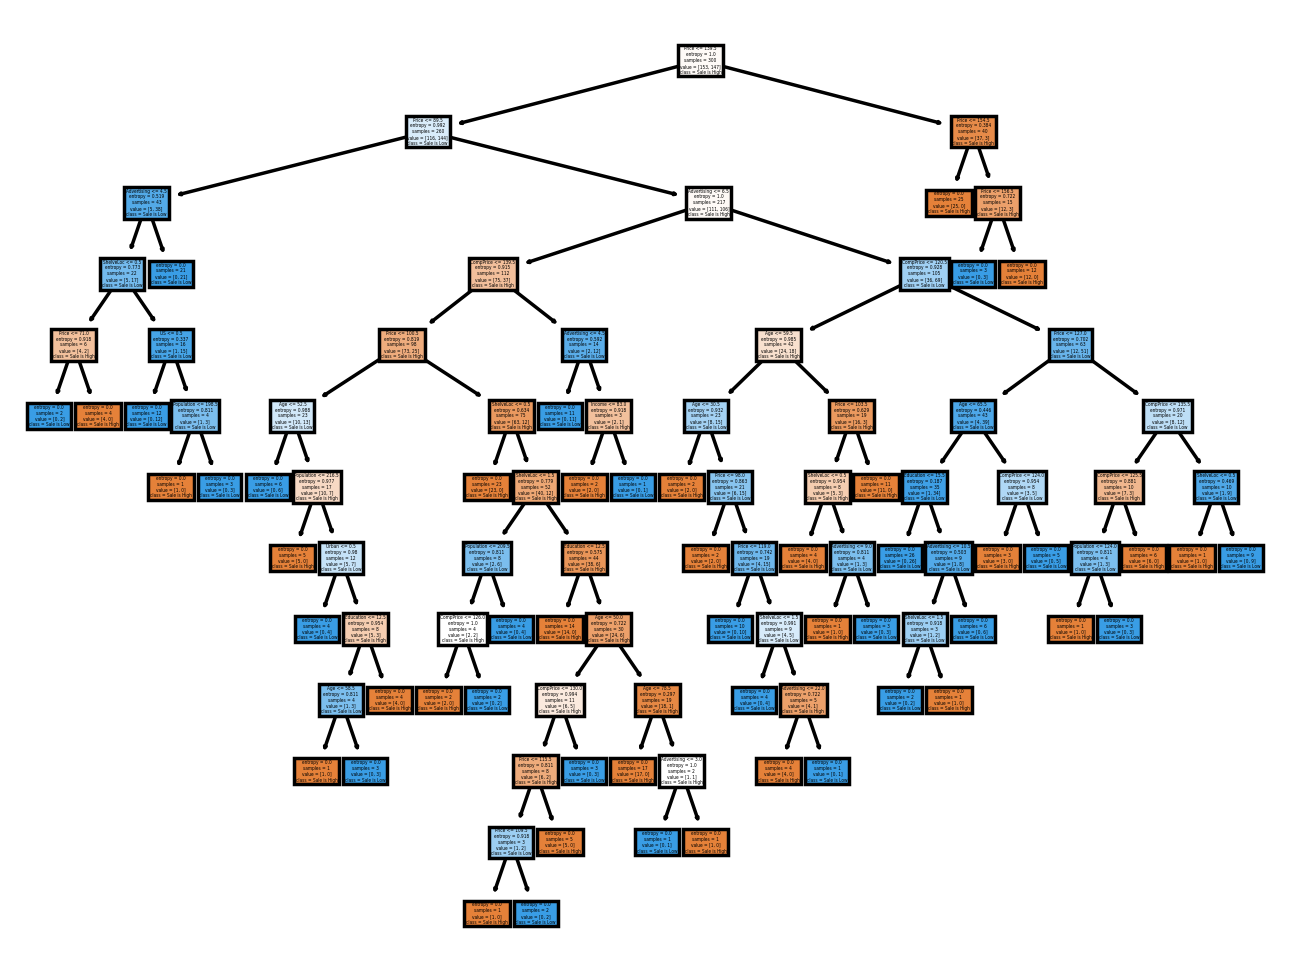

In [19]:
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Sale is High','Sale is Low'],
              filled=True)
plt.show()

In [20]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [21]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        48
           1       0.71      0.69      0.70        52

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



In [22]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.69


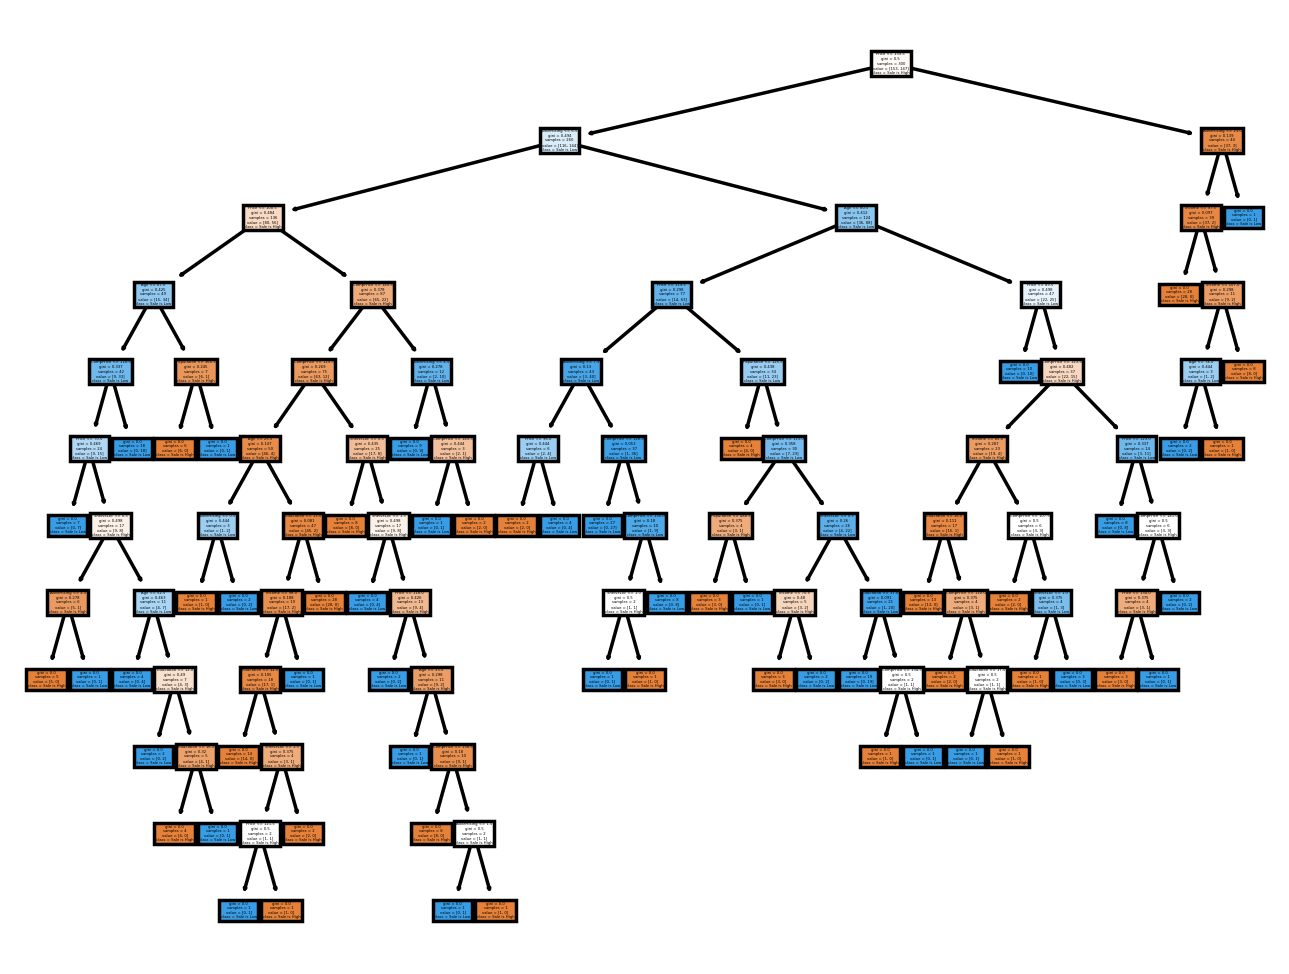

In [23]:
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Sale is High','Sale is Low'],
              filled=True)

plt.show()

# Hyperparameter Tunning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
dt= DecisionTreeClassifier()

param= {
    'criterion': ['gini','entropy'],
    'splitter':['random','best'],
    'max_depth':[1,2,3,4,5,6],
     'class_weight':['balanced']
}

In [26]:
grid= GridSearchCV(DecisionTreeClassifier(),param)

In [27]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']})

In [28]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'splitter': 'random'}

In [31]:
dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',
                           max_depth=6, splitter='random',random_state=10)

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [32]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.84
Testing Accuracy:  0.81


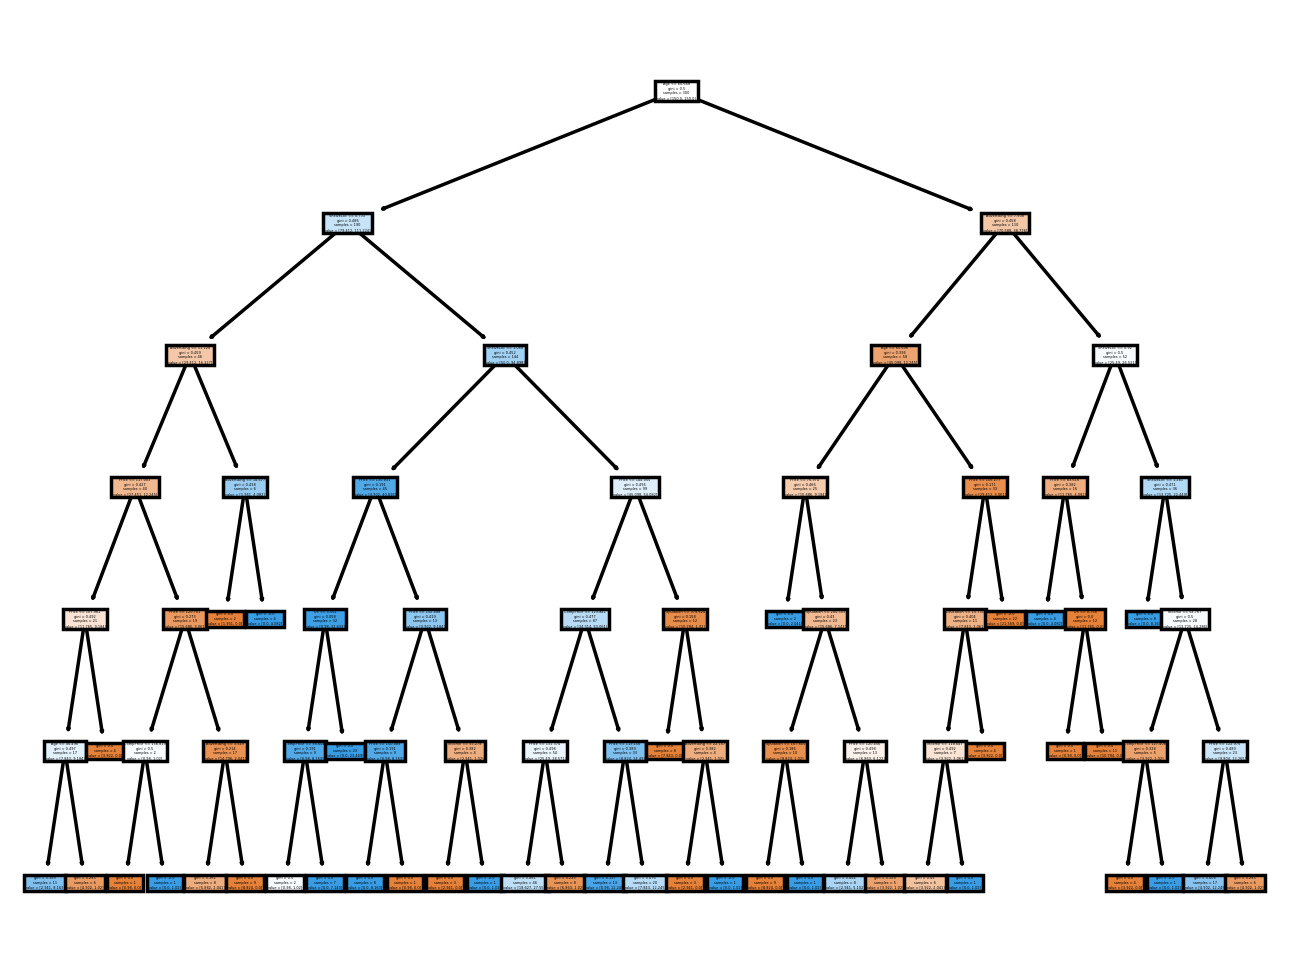

In [33]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()